In [96]:

from __future__ import division
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import scipy.interpolate
from scipy.optimize import curve_fit
#%matplotlib notebook
%matplotlib inline
#%matplotlib widget
#%load_ext autoreload
#%autoreload 2

# My modules
import func_GW_data as funcGW



plt.rc('lines', linewidth=3.0, markersize=10.0)
plt.rc('text', usetex=True)

SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('figure', figsize=(6, 5))
plt.rc('figure', autolayout=True)


Ry2eV = 13.605662285137

In [97]:
# Meus modulos
# from func_GW_data import *
# import func_GW_data

import importlib
importlib.reload(funcGW)

<module 'func_GW_data' from '/mnt/d/Dropbox/0-Work/0-Projects/MAPI/ANALYSIS/func_GW_data.py'>

In [98]:
base_dir = '../DATA/cubic/gw_bse/10-inteqp/Nk16/'

eqp_data = base_dir + 'eqp_q.dat'
Kpoints_v, Ek_n_v, BandsInd_v, Ef_qp_v, Ek_n_mf_v = funcGW.read_eqp_data(eqp_data, -1)

eqp_data = base_dir + 'eqp.dat'
Kpoints_c, Ek_n_c, BandsInd_c, Ef_qp_c, Ek_n_mf_c = funcGW.read_eqp_data(eqp_data, -1)

Nao colocando maximo da banda de val no 0.0
Nao colocando maximo da banda de val no 0.0


In [99]:
# High symmetry points
Gamma = np.array([0, 0, 0])
X = np.array([1/2, 0, 0])
M = np.array([1/2, 1/2, 0])
R = np.array([1/2, 1/2, 1/2])

Path = [Gamma, X, M, R, Gamma]
Names = [r'$\mathrm{\Gamma}$', r'$\mathrm{X}$', r'$\mathrm{M}$', r'$\mathrm{R}$',r'$\mathrm{\Gamma}$']

Dists_symm = [0.0]
for i in range(1, len(Path)):
    dr = np.linalg.norm( np.array(Path[i]) - np.array(Path[i-1]) )
    Dists_symm.append(Dists_symm[-1] + dr)

In [100]:
Path

[array([0, 0, 0]),
 array([0.5, 0. , 0. ]),
 array([0.5, 0.5, 0. ]),
 array([0.5, 0.5, 0.5]),
 array([0, 0, 0])]

In [101]:
K_v, Eqp_v = funcGW.bandstructure(Path, Ek_n_v, Kpoints_v, np.array([0,0,1e-3]))
K_c, Eqp_c = funcGW.bandstructure(Path, Ek_n_c, Kpoints_c, np.array([0,0,0]))

K_v, Emf_v = funcGW.bandstructure(Path, Ek_n_mf_v, Kpoints_v, np.array([0,0,1e-3]))
K_c, Emf_c = funcGW.bandstructure(Path, Ek_n_mf_c, Kpoints_c, np.array([0,0,0]))


[0 0 0] [0.5 0.  0. ]
[0.5 0.  0. ] [0.5 0.5 0. ]
[0.5 0.5 0. ] [0.5 0.5 0.5]
[0.5 0.5 0.5] [0 0 0]
[0 0 0] [0.5 0.  0. ]
[0.5 0.  0. ] [0.5 0.5 0. ]
[0.5 0.5 0. ] [0.5 0.5 0.5]
[0.5 0.5 0.5] [0 0 0]
[0 0 0] [0.5 0.  0. ]
[0.5 0.  0. ] [0.5 0.5 0. ]
[0.5 0.5 0. ] [0.5 0.5 0.5]
[0.5 0.5 0.5] [0 0 0]
[0 0 0] [0.5 0.  0. ]
[0.5 0.  0. ] [0.5 0.5 0. ]
[0.5 0.5 0. ] [0.5 0.5 0.5]
[0.5 0.5 0.5] [0 0 0]


36


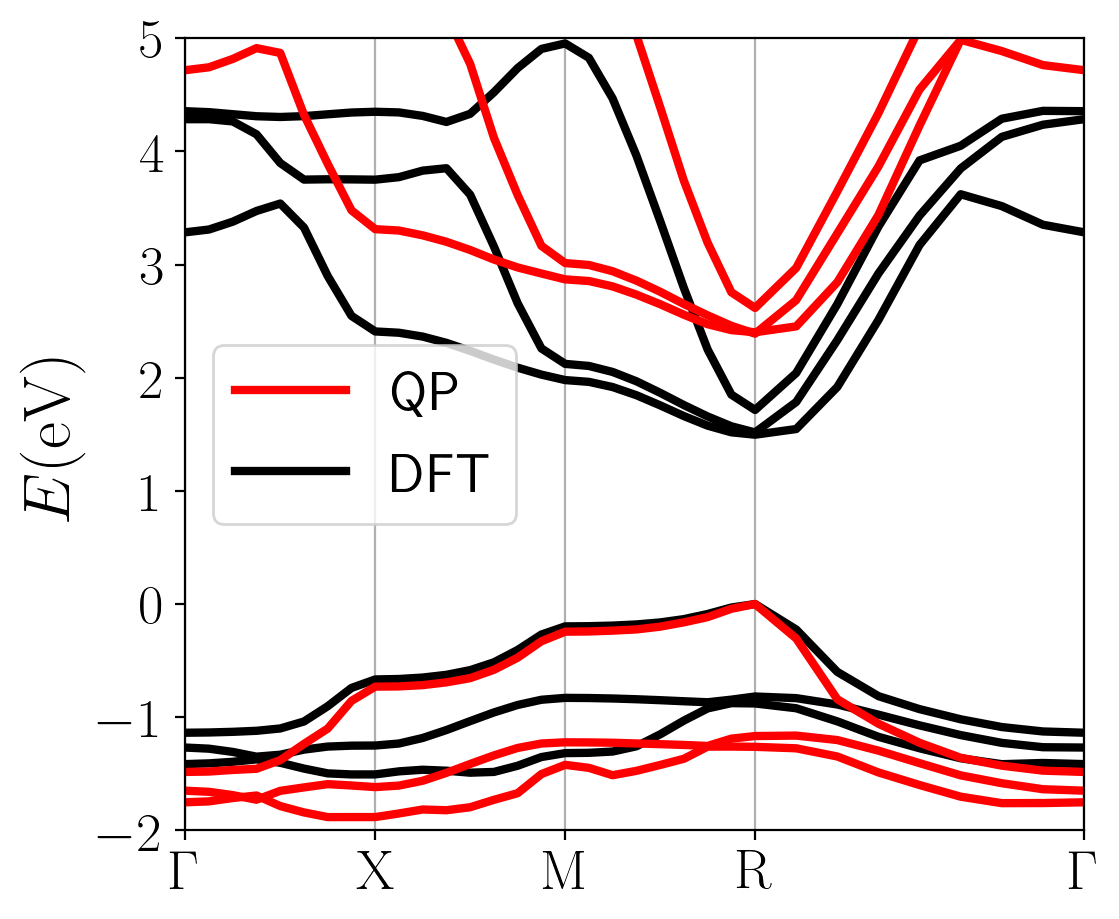

In [102]:
plt.figure(dpi=200)

Ef_qp = np.amax(Eqp_v)
Ef_mf = np.amax(Emf_v)

for i in range(len(Emf_v)):
    plt.plot(K_v, Emf_v[i] - Ef_mf, 'k-')

for i in range(len(Emf_c)):
    plt.plot(K_c, Emf_c[i] - Ef_mf, 'k-')

for i in range(len(Eqp_v)):
    plt.plot(K_v, Eqp_v[i] - Ef_qp, 'r-')

for i in range(len(Eqp_c)):
    plt.plot(K_c, Eqp_c[i] - Ef_qp, 'r-')

plt.xticks(Dists_symm, Names)
plt.ylabel(r'$E(\mathrm{eV})$')

plt.grid(axis='x')

plt.plot([0], [0], 'r-', label='QP')
plt.plot([0], [0], 'k-', label='DFT')

plt.legend(loc='best')

plt.xlim([min(K_c), max(K_c)])
plt.ylim([-2, 5])

plt.savefig('bandstructure_16Nk.png')

print(len(K_c))

# Scissor operator

In [103]:
base_dir = '../DATA/cubic/gw_bse'

# READ QP DATA

eqp_data = base_dir + '/7-sigma/eqp1.dat'

Kpoints, Ek_n, BandsInd, Ef_qp = funcGW.read_eqp_data(eqp_data, 2)

# Read Emf DATA

emf_data = base_dir + '/2-wfn2/out'
Emfk_n, Ef_mf = funcGW.read_Emf_QE(emf_data, 24)

emf_data = base_dir + '/7-sigma/temp2/eqp.dat'
Kpointsmf, Emfk_n, BandsIndmf, Ef_mf = funcGW.read_eqp_data(emf_data, 24)

print(Ef_mf)


Nao achei banda de valencia


ValueError: too many values to unpack (expected 4)

In [ ]:
# PLOT COARSE BANDS

# High symmetry points
Gamma = [0, 0, 0]
X = [1/2, 0, 0]
M = [1/2, 1/2, 0]
R = [1/2, 1/2, 1/2]

Nkpoints = 6
Path = [Gamma, X, M, R, Gamma]
Names = [r'$\mathrm{\Gamma}$', r'$\mathrm{X}$', r'$\mathrm{M}$', r'$\mathrm{R}$',r'$\mathrm{\Gamma}$']

Dists_symm = [0.0]
for i in range(1, len(Path)):
    dr = np.linalg.norm( np.array(Path[i]) - np.array(Path[i-1]) )
    Dists_symm.append(Dists_symm[-1] + dr)

K, Eqp = funcGW.bandstructure(Path, Ek_n, Kpoints, Nkpoints)

K, Emf = funcGW.bandstructure(Path, Emfk_n, Kpoints, Nkpoints)


(-3.0, 8.0)

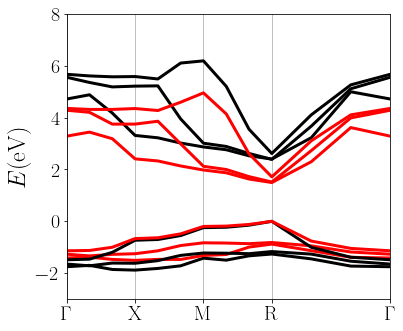

In [ ]:
plt.figure()

for i in range(len(Eqp)):
    plt.plot(K, Eqp[i], 'k-')
    plt.plot(K, Emf[i+22], 'r-')

#for i in range(len(Emf)):
#    plt.plot(K, Emf[i], 'r-')

plt.xticks(Dists_symm, Names)
plt.grid(axis='x')
plt.ylabel(r'$E(\mathrm{eV})$')
plt.xlim([min(K), max(K)])

plt.ylim([-3, 8])


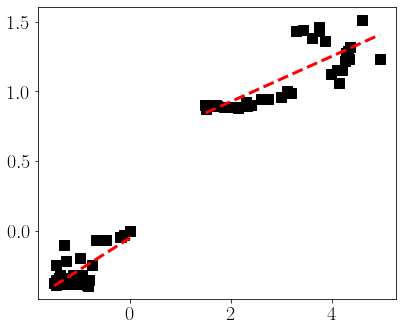

In [ ]:
plt.figure()

xdata_v, ydata_v = [], []
xdata_c, ydata_c = [], []



for i in range(len(Eqp)):
    plt.plot(Emf[i+22], Eqp[i]-Emf[i+22], 'ko')
    for j in range(len(Eqp[i])):
        if Eqp[i][j] > 0:   #CORRIGIR PARA SER > Ef
            xdata_c.append(Emf[i+22][j])
            ydata_c.append(Eqp[i][j]-Emf[i+22][j])
        else:
            xdata_v.append(Emf[i+22][j])
            ydata_v.append(Eqp[i][j]-Emf[i+22][j])

plt.plot(xdata_v, ydata_v, 'sk')
plt.plot(xdata_c, ydata_c, 'sk')

polifit_v = np.polyfit(xdata_v, ydata_v, 1)
polifit_c = np.polyfit(xdata_c, ydata_c, 1)

xfit_v = np.array([min(xdata_v), max(xdata_v)])
xfit_c = np.array([min(xdata_c), max(xdata_c)])

plt.plot(xfit_v, np.poly1d(polifit_v)(xfit_v), 'r--')
plt.plot(xfit_c, np.poly1d(polifit_c)(xfit_c), 'r--')





Text(0, 0.5, '$E_{\\mathrm{QP}} - E_{\\mathrm{DFT}} (\\mathrm{eV})$')

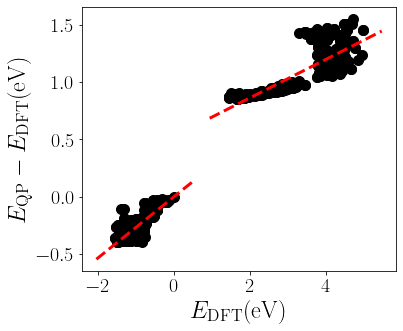

In [ ]:
plt.figure()

xdata_v, ydata_v = [], []
xdata_c, ydata_c = [], []


for i in range(len(Ek_n)):
    for j in range(len(Ek_n[i])):
        plt.plot(Emfk_n[i][j+22], Ek_n[i][j]-Emfk_n[i][j+22], 'ko')    
        if Ek_n[i][j] > 0:
            xdata_c.append(Emfk_n[i][j+22])
            ydata_c.append(Ek_n[i][j]-Emfk_n[i][j+22])
        else:
            xdata_v.append(Emfk_n[i][j+22])
            ydata_v.append(Ek_n[i][j]-Emfk_n[i][j+22])


#plt.plot(xdata_v, ydata_v, 'sk')
#plt.plot(xdata_c, ydata_c, 'sk')

polifit_v = np.polyfit(xdata_v, ydata_v, 1)
polifit_c = np.polyfit(xdata_c, ydata_c, 1)

xfit_v = np.array([min(xdata_v) - 0.5, max(xdata_v) + 0.5])
xfit_c = np.array([min(xdata_c) - 0.5, max(xdata_c) + 0.5])

plt.plot(xfit_v, np.poly1d(polifit_v)(xfit_v), 'r--')
plt.plot(xfit_c, np.poly1d(polifit_c)(xfit_c), 'r--')


plt.xlabel(r'$E_{\mathrm{DFT}} (\mathrm{eV})$')
plt.ylabel(r'$E_{\mathrm{QP}} - E_{\mathrm{DFT}} (\mathrm{eV})$')


(-10.0, 10.0)

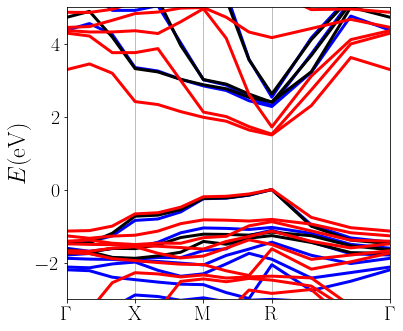

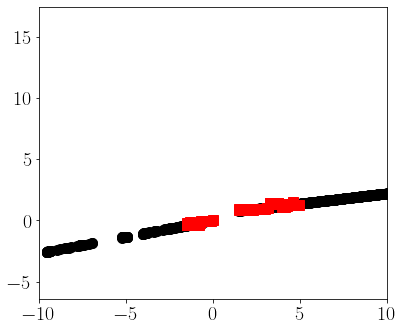

In [ ]:

E_s = []

for i in range(len(Emf)):
    E_s.append([])
    for j in range(len(Emf[i])):
        if Emf[i][j] > 0:
            E_s[-1].append( np.poly1d(polifit_c)(Emf[i][j]) + Emf[i][j] )
        else:
            E_s[-1].append( np.poly1d(polifit_v)(Emf[i][j]) + Emf[i][j])


for i in range(len(E_s)):
    plt.plot(K, E_s[i], 'b-')

for i in range(len(Eqp)):
    plt.plot(K, Eqp[i], 'k-')

for i in range(len(Emf)):
    plt.plot(K, Emf[i], 'r-')

#for i in range(len(Emf)):
#    plt.plot(K, Emf[i], 'r-')

plt.xticks(Dists_symm, Names)
plt.grid(axis='x')
plt.ylabel(r'$E(\mathrm{eV})$')
plt.xlim([min(K), max(K)])

plt.ylim([-3, 5])


plt.figure()

for i in range(len(Emf)):
    for j in range(len(Emf[i])):
        plt.plot(Emf[i][j], E_s[i][j] - Emf[i][j], 'ko')

for i in range(len(Eqp)):
    for j in range(len(Eqp[i])):
        plt.plot(Emf[i+22][j], Eqp[i][j] - Emf[i+22][j], 'rs')


plt.xlim([-10, 10])

In [ ]:
print(polifit_c)
print(polifit_v)

[0.16822082 0.52677792]
[ 0.26754076 -0.00071276]


In [ ]:
Eqp_new = []
Ind_old = [23, 24, 25, 26, 27, 28]


for i in range(len(Emfk_n)):
    Eqp_new.append([])
    for j in range(len(Emfk_n[0])):
        if Ind_old.count(j + 1) == 1:
            Eqp_new[-1].append(Ek_n[i][j - 22])
        else:
            E = Emfk_n[i][j]
            if E > 0:
                Eqp_new[-1].append(E + np.poly1d(polifit_c)(E))
            else:
                Eqp_new[-1].append(E + np.poly1d(polifit_v)(E))


arq_out = open('eqp1_scissor.dat', 'w')

for i in range(len(Kpoints)):
    arq_out.write('  '+str(Kpoints[i][0])+'  '+str(Kpoints[i][1])+'  '+str(Kpoints[i][2])+'  '+str(len(Emfk_n[0]))+'\n')
    for j in range(len(Emfk_n[0])):
        arq_out.write('        1     '+str(j + 1)+'    '+str('%.9f'%(Emfk_n[i][j] + Ef_mf))+'    '+str(Eqp_new[i][j] + Ef_qp)+'\n')


arq_out.close()



In [ ]:
print(Ef_mf)

3.0140218


(-4.0, 8.0)

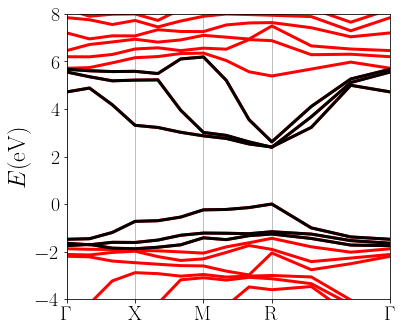

In [ ]:
plt.figure()


eqp_data_new = 'eqp1_scissor.dat'

Kpoints_new, Ek_n_new, BandsInd_new, Ef_qpnew = funcGW.read_eqp_data(eqp_data_new, 24)
K_new, Eqp_new = funcGW.bandstructure(Path, Ek_n_new, Kpoints, Nkpoints)


for i in range(len(Eqp_new)):
    plt.plot(K, Eqp_new[i], 'r-')

for i in range(len(Eqp)):
    plt.plot(K, Eqp[i], 'k-')

plt.xticks(Dists_symm, Names)
plt.grid(axis='x')
plt.ylabel(r'$E(\mathrm{eV})$')
plt.xlim([min(K), max(K)])

plt.ylim([-4, 8])

## Bandstructure

In [ ]:

base_dir = 
eqp_data = base_dir + '/7-sigma/eqp1.dat'

Kpoints, Ek_n, BandsInd, Ef_qp = funcGW.read_eqp_data(eqp_data, 2)

# Absorção


## Variando direção de polarização 

In [109]:
arq_eh_z = '../DATA/cubic/gw_bse/9-absorption/absorption_eh.dat'
arq_noeh_z = '../DATA/cubic/gw_bse/9-absorption/absorption_noeh.dat'

data_eh_z = funcGW.get_espectro_abs(arq_eh_z, True)
data_noeh_z = funcGW.get_espectro_abs(arq_noeh_z, True)

arq_eh_x = '../DATA/cubic/gw_bse/9-absorption_x/absorption_eh.dat'
data_eh_x = funcGW.get_espectro_abs(arq_eh_x, True)

arq_eh_y = '../DATA/cubic/gw_bse/9-absorption_y/absorption_eh.dat'
data_eh_y = funcGW.get_espectro_abs(arq_eh_y, True)

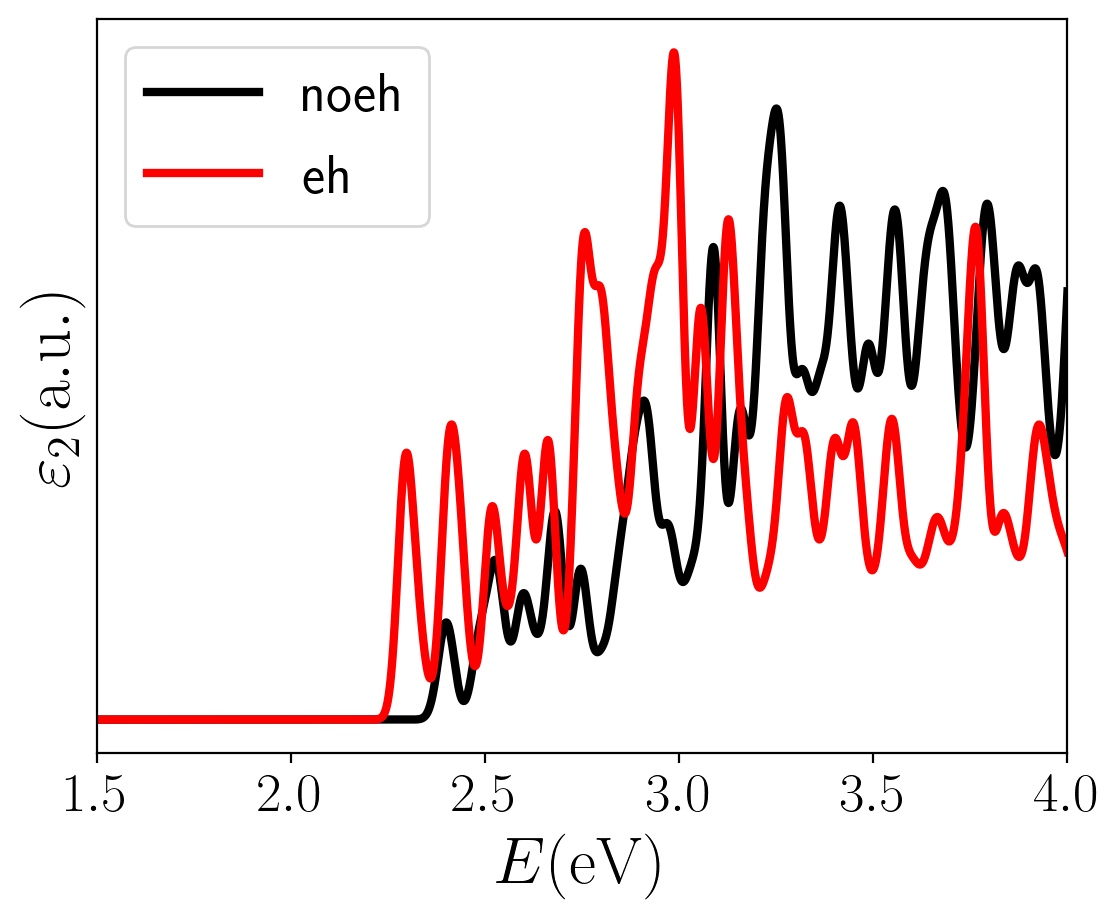

In [110]:
plt.figure(figsize=(6,5), dpi=200)


plt.plot(data_noeh_z[0], data_noeh_z[1], 'k-', label='noeh')
plt.plot(data_eh_z[0], data_eh_z[1], 'r-', label='eh')

plt.xlim([1.5, 4])
plt.legend(loc='upper left')

plt.yticks([])
plt.xlabel(r'$E(\mathrm{eV})$')
plt.ylabel(r'$\varepsilon_2 (\mathrm{a.u.})$')

plt.savefig('Absorption.png')

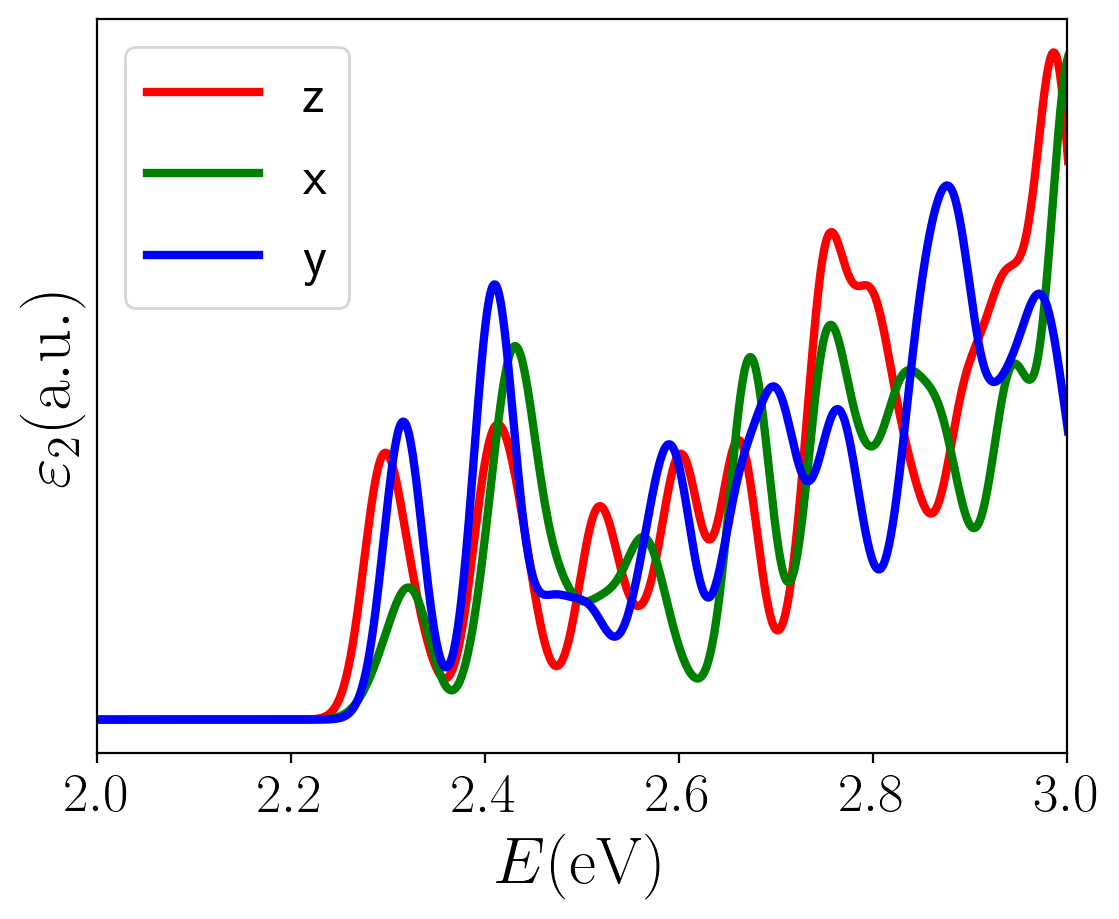

In [153]:
plt.figure(figsize=(6,5), dpi=200)

plt.plot(data_eh_z[0], data_eh_z[1], 'r-', label='z')
plt.plot(data_eh_x[0], data_eh_x[1], 'g-', label='x')
plt.plot(data_eh_y[0], data_eh_y[1], 'b-', label='y')

plt.xlim([2, 3])
plt.legend(loc='upper left')

plt.yticks([])
plt.xlabel(r'$E(\mathrm{eV})$')
plt.ylabel(r'$\varepsilon_2 (\mathrm{a.u.})$')

plt.savefig('Absorption_diff_direction.png')

## Scissors performance

In [154]:

base_dir = '../DATA/cubic/gw_bse/9-absorption_convergence_numbands/'

arq_eh_bnds1 = base_dir+'absorption_eh.dat_1'
data_eh_bnds1 = funcGW.get_espectro_abs(arq_eh_bnds1, False)

arq_eh_bnds2 = base_dir+'absorption_eh.dat_2'
data_eh_bnds2 = funcGW.get_espectro_abs(arq_eh_bnds2, False)

arq_eh_bnds3 = base_dir+'absorption_eh.dat_3'
data_eh_bnds3 = funcGW.get_espectro_abs(arq_eh_bnds3, False)

arq_eh_bnds4 = base_dir+'absorption_eh.dat_4'
data_eh_bnds4 = funcGW.get_espectro_abs(arq_eh_bnds4, False)

arq_eh_bnds5 = base_dir+'absorption_eh.dat_5'
data_eh_bnds5 = funcGW.get_espectro_abs(arq_eh_bnds5, False)

arq_eh_bnds6 = base_dir+'absorption_eh.dat_6'
data_eh_bnds6 = funcGW.get_espectro_abs(arq_eh_bnds6, False)



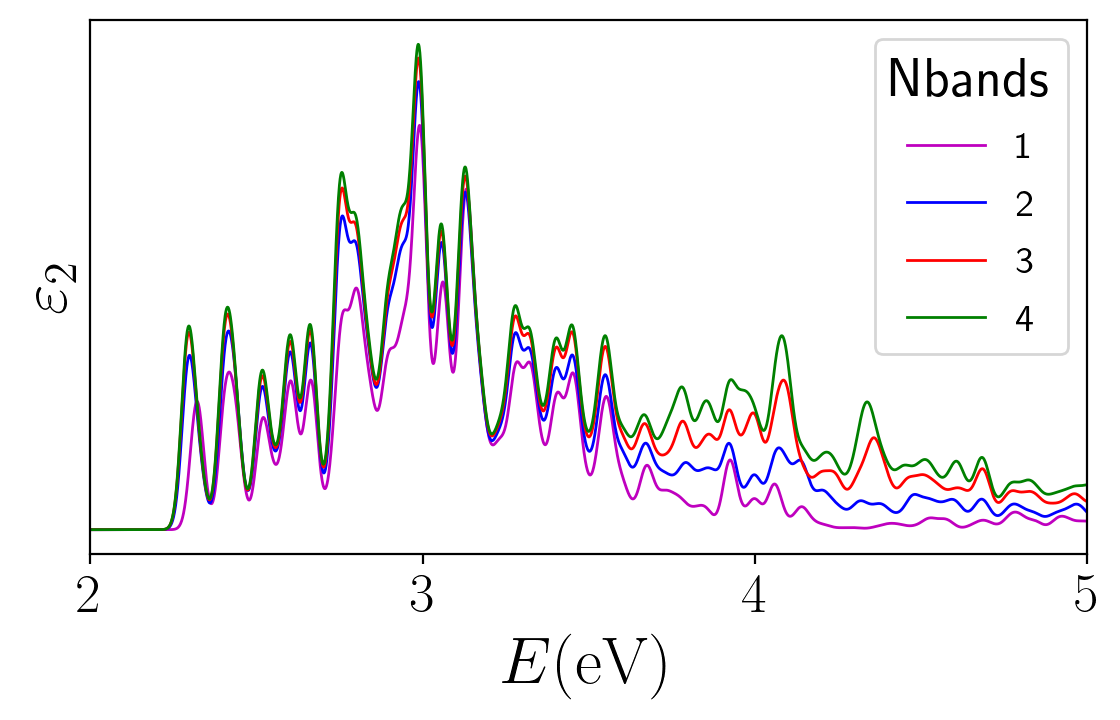

In [156]:
plt.figure(figsize=(6,4), dpi=200)

plt.plot(data_eh_bnds1[0], data_eh_bnds1[1], 'm-', label='1' , linewidth=1.0)
plt.plot(data_eh_bnds2[0], data_eh_bnds2[1], 'b-', label='2' , linewidth=1.0)
plt.plot(data_eh_bnds3[0], data_eh_bnds3[1], 'r-', label='3' , linewidth=1.0)
plt.plot(data_eh_bnds4[0], data_eh_bnds4[1], 'g-', label='4' , linewidth=1.0)
#plt.plot(data_eh_bnds5[0], data_eh_bnds5[1], 'k-', label='5' , linewidth=1.0)
#plt.plot(data_eh_bnds6[0], data_eh_bnds6[1], 'c-', label='6' , linewidth=1.0)




plt.yticks([])
plt.xlim([2, 5])
plt.xlabel(r'$E(\mathrm{eV})$')
plt.ylabel(r'$\varepsilon_2 $')

plt.legend(title='Nbands', fontsize=14)

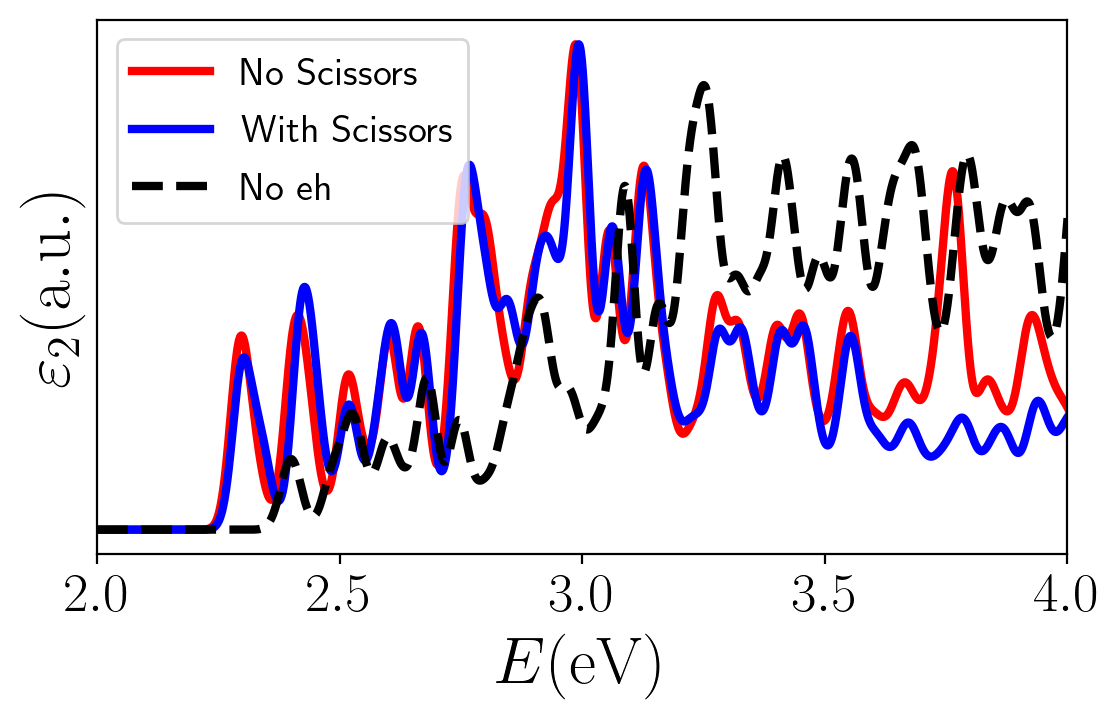

In [112]:
plt.figure(figsize=(6,4), dpi=200)

plt.plot(data_eh_z[0], data_eh_z[1], 'r-', label='No Scissors')
plt.plot(data_eh_scissors[0], data_eh_scissors[1] , 'b-', label='With Scissors')

plt.plot(data_noeh_z[0], data_noeh_z[1], 'k--', label='No eh')

plt.legend(fontsize=14, loc='upper left')

plt.xlim([2, 4])

plt.yticks([])
plt.xlabel(r'$E(\mathrm{eV})$')
plt.ylabel(r'$\varepsilon_2 $')


plt.savefig('Absorption_z_scissors_effect.png')

In [ ]:
arq_eh_scissors = '../DATA/cubic/gw_bse/9-absorption_scissors/absorption_eh.dat'
data_eh_scissors = funcGW.get_espectro_abs(arq_eh_scissors, True)

In [147]:

arq = '../DATA/cubic/gw_bse/9-absorption_fi10/absorption_eh.dat'
data_eh_z_10fi = funcGW.get_espectro_abs(arq, True)

arq = '../DATA/cubic/gw_bse/9-absorption_fi14/absorption_eh.dat'
data_eh_z_14fi = funcGW.get_espectro_abs(arq, True)

arq = '../DATA/cubic/gw_bse/9-absorption_fi16/absorption_eh.dat'
data_eh_z_16fi = funcGW.get_espectro_abs(arq, True)


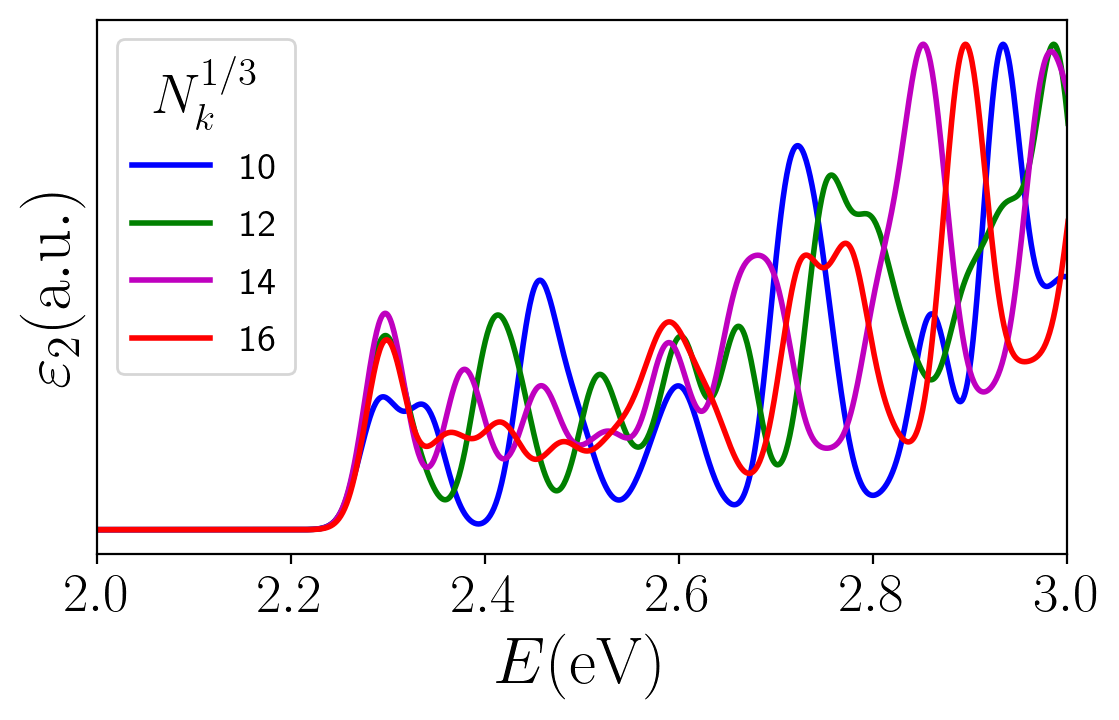

In [151]:
plt.figure(figsize=(6,4), dpi=200)


plt.plot(data_eh_z_10fi[0], data_eh_z_10fi[1], 'b-', label='10', linewidth=2.0)
plt.plot(data_eh_z[0], data_eh_z[1], 'g-', label='12', linewidth=2.0)
plt.plot(data_eh_z_14fi[0], data_eh_z_14fi[1], 'm-', label='14', linewidth=2.0)
plt.plot(data_eh_z_16fi[0], data_eh_z_16fi[1], 'r-', label='16', linewidth=2.0)

plt.legend(title=r'$N_k^{1/3}$', fontsize=14)

plt.xlim([2, 3])

plt.yticks([])
plt.xlabel(r'$E(\mathrm{eV})$')
plt.ylabel(r'$\varepsilon_2 (\mathrm{a.u.})$')

plt.savefig('abs_convergence_Nk.png')